In [1]:
# !pip3 install wordcloud

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1.0,0.0,0.0,0.0,1.0,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0.0,0.0,0.0,0.0,1.0,1
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1.0,0.0,0.0,0.0,1.0,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0.0,0.0,0.0,0.0,0.0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,0.0,0.0,0.0,0.0,0.0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1.0,1.0,1.0,1.0,1.0,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0.0,0.0,0.0,0.0,0.0,0
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df = df.dropna(subset=['sentiment'])

In [5]:
df.isna().sum()

annotation_id                           0
annotator                               0
comment                                 0
created_at                              0
id                                      0
lead_time                               0
rating                                  0
sentiment                               0
updated_at                              0
Вопрос решен                            0
Нравится качество выполнения заявки     0
Нравится качество работы сотрудников    0
Нравится скорость отработки заявок      0
Понравилось выполнение заявки           0
Отрицательное                           0
dtype: int64

In [6]:
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1.0,0.0,0.0,0.0,1.0,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0.0,0.0,0.0,0.0,1.0,1
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1.0,0.0,0.0,0.0,1.0,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0.0,0.0,0.0,0.0,0.0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,0.0,0.0,0.0,0.0,0.0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1.0,1.0,1.0,1.0,1.0,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0.0,0.0,0.0,0.0,0.0,0
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0.0,0.0,0.0,0.0,0.0,0


In [7]:
import pandas as pd
import json
from ast import literal_eval

# Список всех возможных меток
all_labels = [
    "Вопрос решен",  # Обратите внимание: у вас в примере "Вопрос решен", а в списке "Вопрос решен" (разная буква 'о')
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Отрицательное"
]

# Создаём колонки для каждой метки и заполняем 0
for label in all_labels:
    df[label] = 0

# Функция для обработки каждой строки
def process_sentiment(row):
    sentiment = row['sentiment']
    
    # Пытаемся распарсить JSON, если не получается - обрабатываем как строку
    try:
        # Пробуем literal_eval на случай, если это строковое представление словаря
        if isinstance(sentiment, str):
            try:
                data = literal_eval(sentiment)
                if isinstance(data, dict) and 'choices' in data:
                    labels = data['choices']
                else:
                    labels = [str(data)] if data else []
            except:
                labels = [sentiment]
        elif isinstance(sentiment, dict):
            labels = sentiment.get('choices', [])
        else:
            labels = [str(sentiment)]
    except:
        labels = [str(sentiment)]
    
    # Заполняем соответствующие колонки
    for label in labels:
        # Проверяем, есть ли метка в нашем списке (с учётом возможных опечаток)
        if label in all_labels:
            row[label] = 1
        else:
            # Дополнительная проверка для похожих меток
            for existing_label in all_labels:
                if label.lower() == existing_label.lower():
                    row[existing_label] = 1
                    break
    
    return row

# Применяем функцию к каждой строке
df = df.apply(process_sentiment, axis=1)

# Удаляем исходную колонку sentiment, если она больше не нужна
# df = df.drop('sentiment', axis=1)
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1,0,0,0,1,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0,0,0,0,1,0
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1,0,0,0,1,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0,0,0,1,0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,1,0,0,0,0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1,1,1,1,1,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0,0,0,0,0,1
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0,0,0,0,0,1


In [8]:
import pandas as pd
import json
from ast import literal_eval

# Список нужных меток
labels = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",  # Опечатка в вашем примере ("Нравится" vs "Нравится")
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Отрицательное"
]

# Создаём пустые колонки, заполняем 0
for label in labels:
    if label not in df.columns:
        df[label] = 0

# Функция для разбора sentiment
def parse_sentiment(sentiment):
    if pd.isna(sentiment):
        return []
    if isinstance(sentiment, str):
        try:
            data = literal_eval(sentiment)  # Пробуем распарсить JSON-строку
            if isinstance(data, dict):
                return data.get("choices", [])
            return [str(data)]
        except:
            return [sentiment]
    elif isinstance(sentiment, dict):
        return sentiment.get("choices", [])
    else:
        return [str(sentiment)]

# Заполняем колонки 1, если метка есть
for index, row in df.iterrows():
    sentiment_labels = parse_sentiment(row["sentiment"])
    for label in labels:
        if label in sentiment_labels:
            df.at[index, label] = 1

In [9]:
label_counts = df[labels].sum().sort_values(ascending=False)
print(label_counts)

Вопрос решен                            1233
Нравится скорость отработки заявок       579
Понравилось выполнение заявки            577
Нравится качество работы сотрудников     376
Отрицательное                            262
Нравится качество выполнения заявки      130
dtype: int64


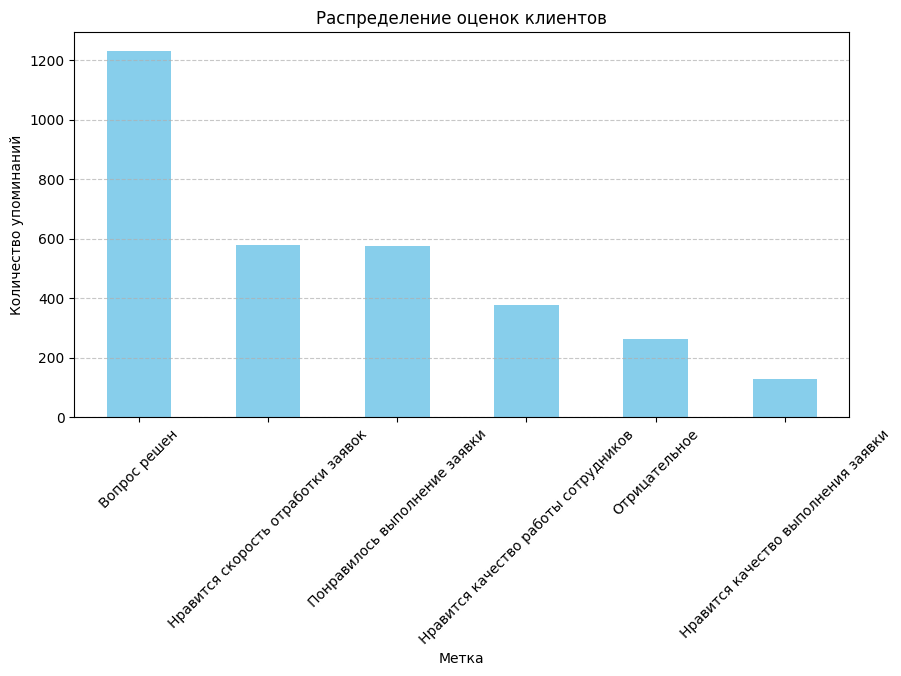

In [10]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Распределение оценок клиентов")
plt.ylabel("Количество упоминаний")
plt.xlabel("Метка")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df.describe()

,annotation_id,annotator,id,lead_time,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
count,2372.000000,2372.0,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000
mean,706.737774,1.0,4.046167e+06,13.850452,4.954890,0.519815,0.054806,0.158516,0.244098,0.243255,0.110455
std,487.078887,0.0,1.651233e+05,63.121182,0.382103,0.499713,0.227649,0.365301,0.429642,0.429138,0.313523
min,1.000000,1.0,2.945792e+06,1.165000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.750000,1.0,3.912365e+06,2.573500,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,1.0,3.953161e+06,4.048000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1109.250000,1.0,4.203986e+06,8.437500,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1702.000000,1.0,4.237692e+06,2207.779000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk

# Скачиваем стоп-слова для русского языка (если ещё не установлены)
nltk.download('stopwords')

# Загружаем стоп-слова
russian_stopwords = stopwords.words('russian') + ['это', 'всё', 'весь', 'который', 'очень']

# Функция для очистки текста
def clean_text(text):
    if pd.isna(text):
        return ""
    # Удаляем пунктуацию и цифры
    text = ''.join([char for char in str(text) if char not in string.punctuation and not char.isdigit()])
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем стоп-слова
    text = ' '.join([word for word in text.split() if word not in russian_stopwords and len(word) > 2])
    return text

# Применяем очистку к колонке comment
df['cleaned_comment'] = df['comment'].apply(clean_text)

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Объединяем все комментарии в один текст
all_comments = ' '.join(df['cleaned_comment'].dropna())

# Создаём WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=russian_stopwords,
    colormap='viridis',  # Можно выбрать другой: 'plasma', 'magma', 'inferno'
    max_words=100,
    contour_width=1,
    contour_color='steelblue'
).generate(all_comments)

# Отображаем облако слов
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Часто встречающиеся слова в комментариях", fontsize=16, pad=20)
plt.show()